In [ ]:
import pandas as pd
import numpy as np

In [ ]:
def err_metric(CM): 
      
    TN = CM.iloc[0,0]
    FN = CM.iloc[1,0]
    TP = CM.iloc[1,1]
    FP = CM.iloc[0,1]
    precision =(TP)/(TP+FP)
    accuracy_model  =(TP+TN)/(TP+TN+FP+FN)
    recall_score  =(TP)/(TP+FN)
    specificity_value =(TN)/(TN + FP)
      
    False_positive_rate =(FP)/(FP+TN)
    False_negative_rate =(FN)/(FN+TP)
    f1_score =2*(( precision * recall_score)/( precision + recall_score))
    print("Precision value of the model: ",precision)
    print("Accuracy of the model: ",accuracy_model)
    print("Recall of the model: ",recall_score)
    print("Specificity of the model: ",specificity_value)

In [ ]:
delirium_dataset=pd.read_csv('/content/delirium_mimic_dataset_missing_imputed.csv')
delirium_dataset.drop('Unnamed: 0',inplace=True,axis=1)

# Feature Encoding

## Catboost Encoder

In [ ]:
delirium_dataset_encoded=delirium_dataset.copy()

In [ ]:
!pip install --upgrade category_encoders

In [ ]:
import category_encoders as ce

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
cbe = ce.CatBoostEncoder(cols=['DISCHARGE_LOCATION'])
delirium_dataset_encoded['DISCHARGE_LOCATION'] = cbe.fit_transform(delirium_dataset['DISCHARGE_LOCATION'],delirium_dataset.Delirium)
delirium_dataset_encoded

,AGE,ALT,ART BP Systolic,ART BP mean,ART Lumen Volume,AST,Admission Weight (Kg),Albumin,Alkaline Phosphate,Ammonia,...,Pulmonary Artery Pressure mean,RELIGION,Respiratory Rate,Sodium (serum),Temperature Celsius,Total Bilirubin,Venous CO2 Pressure,Venous O2 Pressure,Ventilator Tank #1,WBC
0,75.287671,14.625000,110.121564,117.000000,1.776951,18.666667,65.284748,1.976923,67.937500,41.896000,...,28.120382,CATHOLIC,19.213248,135.831776,36.790870,0.250000,61.875000,49.875000,2035.542169,10.573626
1,81.128767,22.000000,115.156716,356.500000,1.227688,30.000000,68.100000,3.350000,83.000000,-189.839353,...,-382.848191,NOT SPECIFIED,16.885154,143.058824,36.490050,0.200000,60.500000,40.750000,2156.250000,7.423077
2,75.887671,20.666667,94.429669,125.000000,2.300000,18.500000,106.187923,2.083333,146.833333,53.250487,...,29.688995,NOT SPECIFIED,20.700000,140.016129,39.923196,0.200000,49.166667,59.833333,1879.120879,14.581013
3,53.682192,30.333333,117.364350,95.863471,1.781689,38.250000,77.877338,3.000000,80.000000,44.048273,...,27.977587,CATHOLIC,18.500367,143.695652,37.378148,0.275000,83.166667,79.666667,1954.705882,13.052500
4,70.758904,71.000000,129.543340,85.000000,1.691685,113.000000,60.389001,2.050000,102.000000,44.967481,...,30.031274,NOT SPECIFIED,19.098462,141.368421,36.629274,0.300000,54.000000,172.000000,2391.935484,20.731579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8641,62.959449,301.757721,93.413793,86.177893,1.705318,148.690843,79.201246,2.761528,128.575455,47.687032,...,28.143650,CATHOLIC,22.900000,138.000000,35.796296,1.634226,48.266947,61.222706,1989.393458,9.775000
8642,72.651520,-55.682184,156.020408,88.023220,1.702226,176.864488,46.921161,2.902954,160.588884,47.762395,...,25.354754,CATHOLIC,17.406250,135.000000,36.321637,1.800394,48.024201,62.014360,1991.812205,4.140000
8643,64.419431,257.347876,109.131148,88.171228,1.704027,189.495112,71.899354,2.641244,148.622771,47.687032,...,27.748658,CATHOLIC,16.372881,137.600000,37.399306,1.748749,48.283297,60.511903,1983.132701,7.700000
8644,56.803376,168.689049,106.333333,85.562593,1.715720,113.731382,75.000000,2.893243,165.371832,46.691705,...,23.000000,CATHOLIC,14.500000,138.700000,36.129641,3.808259,47.817090,62.360699,2015.385052,8.014286


In [ ]:
cbe = ce.CatBoostEncoder(cols=['ETHNICITY'])
delirium_dataset_encoded['ETHNICITY'] = cbe.fit_transform(delirium_dataset['ETHNICITY'],delirium_dataset.Delirium)
delirium_dataset_encoded

,AGE,ALT,ART BP Systolic,ART BP mean,ART Lumen Volume,AST,Admission Weight (Kg),Albumin,Alkaline Phosphate,Ammonia,...,Pulmonary Artery Pressure mean,RELIGION,Respiratory Rate,Sodium (serum),Temperature Celsius,Total Bilirubin,Venous CO2 Pressure,Venous O2 Pressure,Ventilator Tank #1,WBC
0,75.287671,14.625000,110.121564,117.000000,1.776951,18.666667,65.284748,1.976923,67.937500,41.896000,...,28.120382,CATHOLIC,19.213248,135.831776,36.790870,0.250000,61.875000,49.875000,2035.542169,10.573626
1,81.128767,22.000000,115.156716,356.500000,1.227688,30.000000,68.100000,3.350000,83.000000,-189.839353,...,-382.848191,NOT SPECIFIED,16.885154,143.058824,36.490050,0.200000,60.500000,40.750000,2156.250000,7.423077
2,75.887671,20.666667,94.429669,125.000000,2.300000,18.500000,106.187923,2.083333,146.833333,53.250487,...,29.688995,NOT SPECIFIED,20.700000,140.016129,39.923196,0.200000,49.166667,59.833333,1879.120879,14.581013
3,53.682192,30.333333,117.364350,95.863471,1.781689,38.250000,77.877338,3.000000,80.000000,44.048273,...,27.977587,CATHOLIC,18.500367,143.695652,37.378148,0.275000,83.166667,79.666667,1954.705882,13.052500
4,70.758904,71.000000,129.543340,85.000000,1.691685,113.000000,60.389001,2.050000,102.000000,44.967481,...,30.031274,NOT SPECIFIED,19.098462,141.368421,36.629274,0.300000,54.000000,172.000000,2391.935484,20.731579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8641,62.959449,301.757721,93.413793,86.177893,1.705318,148.690843,79.201246,2.761528,128.575455,47.687032,...,28.143650,CATHOLIC,22.900000,138.000000,35.796296,1.634226,48.266947,61.222706,1989.393458,9.775000
8642,72.651520,-55.682184,156.020408,88.023220,1.702226,176.864488,46.921161,2.902954,160.588884,47.762395,...,25.354754,CATHOLIC,17.406250,135.000000,36.321637,1.800394,48.024201,62.014360,1991.812205,4.140000
8643,64.419431,257.347876,109.131148,88.171228,1.704027,189.495112,71.899354,2.641244,148.622771,47.687032,...,27.748658,CATHOLIC,16.372881,137.600000,37.399306,1.748749,48.283297,60.511903,1983.132701,7.700000
8644,56.803376,168.689049,106.333333,85.562593,1.715720,113.731382,75.000000,2.893243,165.371832,46.691705,...,23.000000,CATHOLIC,14.500000,138.700000,36.129641,3.808259,47.817090,62.360699,2015.385052,8.014286


In [ ]:
cbe = ce.CatBoostEncoder(cols=['INSURANCE'])
delirium_dataset_encoded['INSURANCE'] = cbe.fit_transform(delirium_dataset['INSURANCE'],delirium_dataset.Delirium)
delirium_dataset_encoded

,AGE,ALT,ART BP Systolic,ART BP mean,ART Lumen Volume,AST,Admission Weight (Kg),Albumin,Alkaline Phosphate,Ammonia,...,Pulmonary Artery Pressure mean,RELIGION,Respiratory Rate,Sodium (serum),Temperature Celsius,Total Bilirubin,Venous CO2 Pressure,Venous O2 Pressure,Ventilator Tank #1,WBC
0,75.287671,14.625000,110.121564,117.000000,1.776951,18.666667,65.284748,1.976923,67.937500,41.896000,...,28.120382,CATHOLIC,19.213248,135.831776,36.790870,0.250000,61.875000,49.875000,2035.542169,10.573626
1,81.128767,22.000000,115.156716,356.500000,1.227688,30.000000,68.100000,3.350000,83.000000,-189.839353,...,-382.848191,NOT SPECIFIED,16.885154,143.058824,36.490050,0.200000,60.500000,40.750000,2156.250000,7.423077
2,75.887671,20.666667,94.429669,125.000000,2.300000,18.500000,106.187923,2.083333,146.833333,53.250487,...,29.688995,NOT SPECIFIED,20.700000,140.016129,39.923196,0.200000,49.166667,59.833333,1879.120879,14.581013
3,53.682192,30.333333,117.364350,95.863471,1.781689,38.250000,77.877338,3.000000,80.000000,44.048273,...,27.977587,CATHOLIC,18.500367,143.695652,37.378148,0.275000,83.166667,79.666667,1954.705882,13.052500
4,70.758904,71.000000,129.543340,85.000000,1.691685,113.000000,60.389001,2.050000,102.000000,44.967481,...,30.031274,NOT SPECIFIED,19.098462,141.368421,36.629274,0.300000,54.000000,172.000000,2391.935484,20.731579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8641,62.959449,301.757721,93.413793,86.177893,1.705318,148.690843,79.201246,2.761528,128.575455,47.687032,...,28.143650,CATHOLIC,22.900000,138.000000,35.796296,1.634226,48.266947,61.222706,1989.393458,9.775000
8642,72.651520,-55.682184,156.020408,88.023220,1.702226,176.864488,46.921161,2.902954,160.588884,47.762395,...,25.354754,CATHOLIC,17.406250,135.000000,36.321637,1.800394,48.024201,62.014360,1991.812205,4.140000
8643,64.419431,257.347876,109.131148,88.171228,1.704027,189.495112,71.899354,2.641244,148.622771,47.687032,...,27.748658,CATHOLIC,16.372881,137.600000,37.399306,1.748749,48.283297,60.511903,1983.132701,7.700000
8644,56.803376,168.689049,106.333333,85.562593,1.715720,113.731382,75.000000,2.893243,165.371832,46.691705,...,23.000000,CATHOLIC,14.500000,138.700000,36.129641,3.808259,47.817090,62.360699,2015.385052,8.014286


In [ ]:
cbe = ce.CatBoostEncoder(cols=['LANGUAGE'])
delirium_dataset_encoded['LANGUAGE'] = cbe.fit_transform(delirium_dataset['LANGUAGE'],delirium_dataset.Delirium)
delirium_dataset_encoded

,AGE,ALT,ART BP Systolic,ART BP mean,ART Lumen Volume,AST,Admission Weight (Kg),Albumin,Alkaline Phosphate,Ammonia,...,Pulmonary Artery Pressure mean,RELIGION,Respiratory Rate,Sodium (serum),Temperature Celsius,Total Bilirubin,Venous CO2 Pressure,Venous O2 Pressure,Ventilator Tank #1,WBC
0,75.287671,14.625000,110.121564,117.000000,1.776951,18.666667,65.284748,1.976923,67.937500,41.896000,...,28.120382,CATHOLIC,19.213248,135.831776,36.790870,0.250000,61.875000,49.875000,2035.542169,10.573626
1,81.128767,22.000000,115.156716,356.500000,1.227688,30.000000,68.100000,3.350000,83.000000,-189.839353,...,-382.848191,NOT SPECIFIED,16.885154,143.058824,36.490050,0.200000,60.500000,40.750000,2156.250000,7.423077
2,75.887671,20.666667,94.429669,125.000000,2.300000,18.500000,106.187923,2.083333,146.833333,53.250487,...,29.688995,NOT SPECIFIED,20.700000,140.016129,39.923196,0.200000,49.166667,59.833333,1879.120879,14.581013
3,53.682192,30.333333,117.364350,95.863471,1.781689,38.250000,77.877338,3.000000,80.000000,44.048273,...,27.977587,CATHOLIC,18.500367,143.695652,37.378148,0.275000,83.166667,79.666667,1954.705882,13.052500
4,70.758904,71.000000,129.543340,85.000000,1.691685,113.000000,60.389001,2.050000,102.000000,44.967481,...,30.031274,NOT SPECIFIED,19.098462,141.368421,36.629274,0.300000,54.000000,172.000000,2391.935484,20.731579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8641,62.959449,301.757721,93.413793,86.177893,1.705318,148.690843,79.201246,2.761528,128.575455,47.687032,...,28.143650,CATHOLIC,22.900000,138.000000,35.796296,1.634226,48.266947,61.222706,1989.393458,9.775000
8642,72.651520,-55.682184,156.020408,88.023220,1.702226,176.864488,46.921161,2.902954,160.588884,47.762395,...,25.354754,CATHOLIC,17.406250,135.000000,36.321637,1.800394,48.024201,62.014360,1991.812205,4.140000
8643,64.419431,257.347876,109.131148,88.171228,1.704027,189.495112,71.899354,2.641244,148.622771,47.687032,...,27.748658,CATHOLIC,16.372881,137.600000,37.399306,1.748749,48.283297,60.511903,1983.132701,7.700000
8644,56.803376,168.689049,106.333333,85.562593,1.715720,113.731382,75.000000,2.893243,165.371832,46.691705,...,23.000000,CATHOLIC,14.500000,138.700000,36.129641,3.808259,47.817090,62.360699,2015.385052,8.014286


In [ ]:
cbe = ce.CatBoostEncoder(cols=['MARITAL_STATUS'])
delirium_dataset_encoded['MARITAL_STATUS'] = cbe.fit_transform(delirium_dataset['MARITAL_STATUS'],delirium_dataset.Delirium)
delirium_dataset_encoded

,AGE,ALT,ART BP Systolic,ART BP mean,ART Lumen Volume,AST,Admission Weight (Kg),Albumin,Alkaline Phosphate,Ammonia,...,Pulmonary Artery Pressure mean,RELIGION,Respiratory Rate,Sodium (serum),Temperature Celsius,Total Bilirubin,Venous CO2 Pressure,Venous O2 Pressure,Ventilator Tank #1,WBC
0,75.287671,14.625000,110.121564,117.000000,1.776951,18.666667,65.284748,1.976923,67.937500,41.896000,...,28.120382,CATHOLIC,19.213248,135.831776,36.790870,0.250000,61.875000,49.875000,2035.542169,10.573626
1,81.128767,22.000000,115.156716,356.500000,1.227688,30.000000,68.100000,3.350000,83.000000,-189.839353,...,-382.848191,NOT SPECIFIED,16.885154,143.058824,36.490050,0.200000,60.500000,40.750000,2156.250000,7.423077
2,75.887671,20.666667,94.429669,125.000000,2.300000,18.500000,106.187923,2.083333,146.833333,53.250487,...,29.688995,NOT SPECIFIED,20.700000,140.016129,39.923196,0.200000,49.166667,59.833333,1879.120879,14.581013
3,53.682192,30.333333,117.364350,95.863471,1.781689,38.250000,77.877338,3.000000,80.000000,44.048273,...,27.977587,CATHOLIC,18.500367,143.695652,37.378148,0.275000,83.166667,79.666667,1954.705882,13.052500
4,70.758904,71.000000,129.543340,85.000000,1.691685,113.000000,60.389001,2.050000,102.000000,44.967481,...,30.031274,NOT SPECIFIED,19.098462,141.368421,36.629274,0.300000,54.000000,172.000000,2391.935484,20.731579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8641,62.959449,301.757721,93.413793,86.177893,1.705318,148.690843,79.201246,2.761528,128.575455,47.687032,...,28.143650,CATHOLIC,22.900000,138.000000,35.796296,1.634226,48.266947,61.222706,1989.393458,9.775000
8642,72.651520,-55.682184,156.020408,88.023220,1.702226,176.864488,46.921161,2.902954,160.588884,47.762395,...,25.354754,CATHOLIC,17.406250,135.000000,36.321637,1.800394,48.024201,62.014360,1991.812205,4.140000
8643,64.419431,257.347876,109.131148,88.171228,1.704027,189.495112,71.899354,2.641244,148.622771,47.687032,...,27.748658,CATHOLIC,16.372881,137.600000,37.399306,1.748749,48.283297,60.511903,1983.132701,7.700000
8644,56.803376,168.689049,106.333333,85.562593,1.715720,113.731382,75.000000,2.893243,165.371832,46.691705,...,23.000000,CATHOLIC,14.500000,138.700000,36.129641,3.808259,47.817090,62.360699,2015.385052,8.014286


In [ ]:
cbe = ce.CatBoostEncoder(cols=['RELIGION'])
delirium_dataset_encoded['RELIGION'] = cbe.fit_transform(delirium_dataset['RELIGION'],delirium_dataset.Delirium)
delirium_dataset_encoded

,AGE,ALT,ART BP Systolic,ART BP mean,ART Lumen Volume,AST,Admission Weight (Kg),Albumin,Alkaline Phosphate,Ammonia,...,Pulmonary Artery Pressure mean,RELIGION,Respiratory Rate,Sodium (serum),Temperature Celsius,Total Bilirubin,Venous CO2 Pressure,Venous O2 Pressure,Ventilator Tank #1,WBC
0,75.287671,14.625000,110.121564,117.000000,1.776951,18.666667,65.284748,1.976923,67.937500,41.896000,...,28.120382,0.108721,19.213248,135.831776,36.790870,0.250000,61.875000,49.875000,2035.542169,10.573626
1,81.128767,22.000000,115.156716,356.500000,1.227688,30.000000,68.100000,3.350000,83.000000,-189.839353,...,-382.848191,0.108721,16.885154,143.058824,36.490050,0.200000,60.500000,40.750000,2156.250000,7.423077
2,75.887671,20.666667,94.429669,125.000000,2.300000,18.500000,106.187923,2.083333,146.833333,53.250487,...,29.688995,0.054360,20.700000,140.016129,39.923196,0.200000,49.166667,59.833333,1879.120879,14.581013
3,53.682192,30.333333,117.364350,95.863471,1.781689,38.250000,77.877338,3.000000,80.000000,44.048273,...,27.977587,0.054360,18.500367,143.695652,37.378148,0.275000,83.166667,79.666667,1954.705882,13.052500
4,70.758904,71.000000,129.543340,85.000000,1.691685,113.000000,60.389001,2.050000,102.000000,44.967481,...,30.031274,0.036240,19.098462,141.368421,36.629274,0.300000,54.000000,172.000000,2391.935484,20.731579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8641,62.959449,301.757721,93.413793,86.177893,1.705318,148.690843,79.201246,2.761528,128.575455,47.687032,...,28.143650,0.117302,22.900000,138.000000,35.796296,1.634226,48.266947,61.222706,1989.393458,9.775000
8642,72.651520,-55.682184,156.020408,88.023220,1.702226,176.864488,46.921161,2.902954,160.588884,47.762395,...,25.354754,0.117572,17.406250,135.000000,36.321637,1.800394,48.024201,62.014360,1991.812205,4.140000
8643,64.419431,257.347876,109.131148,88.171228,1.704027,189.495112,71.899354,2.641244,148.622771,47.687032,...,27.748658,0.117842,16.372881,137.600000,37.399306,1.748749,48.283297,60.511903,1983.132701,7.700000
8644,56.803376,168.689049,106.333333,85.562593,1.715720,113.731382,75.000000,2.893243,165.371832,46.691705,...,23.000000,0.117806,14.500000,138.700000,36.129641,3.808259,47.817090,62.360699,2015.385052,8.014286


In [ ]:
delirium_dataset_encoded.to_csv("delirium_dataset_catboost_encoded.csv")

In [ ]:
disloc=np.unique(delirium_dataset['DISCHARGE_LOCATION'].tolist())
eth=np.unique(delirium_dataset['ETHNICITY'].tolist())
ins=np.unique(delirium_dataset['INSURANCE'].tolist())
lang=np.unique(delirium_dataset['LANGUAGE'].tolist())
martst=np.unique(delirium_dataset['MARITAL_STATUS'].tolist())
rel=np.unique(delirium_dataset['RELIGION'].tolist())

In [ ]:
print(len(lang))
print(len(rel))
print(len(disloc))
print(len(eth))
print(len(martst))
print(len(ins))

40
16
14
13
7
5


# XGBBOOST Hyperparameters Tuning

## Imbalanced Dataset 

In [ ]:
y = delirium_dataset_encoded["Delirium"].values
X=delirium_dataset_encoded.drop(["Delirium"], axis=1)
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30, random_state=0)


## Undersampled Dataset

In [ ]:
sample=delirium_dataset_encoded[delirium_dataset_encoded['Delirium']==0]
delirium=delirium_dataset_encoded[delirium_dataset_encoded['Delirium']==1]

In [ ]:
ignore_me, sample = train_test_split(sample, test_size = 0.1)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

sample = pd.concat([sample, delirium])

# Split into train and test units.
xtrain, xtest = train_test_split(sample, test_size = 0.3)
ytrain = xtrain['Delirium']
ytest = xtest['Delirium']
xtrain.drop('Delirium', 1, inplace = True)
xtest.drop('Delirium', 1, inplace = True)

## Oversampled Dataset

In [ ]:
!pip install imblearn

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42,sampling_strategy={1:7000})
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape {}'.format(Counter(y_res)))
'''Split the resampled data into train & test data with 70:30 mix'''

xtrain, xtest, ytrain, ytest = train_test_split(X_res, y_res, test_size=0.30, random_state=0)
print('xtrain shape')
print(xtrain.shape)
print('xtest shape')
print(xtest.shape)

Resampled dataset shape Counter({0: 7706, 1: 7000})
xtrain shape
(10294, 73)
xtest shape
(4412, 73)


## Hyperparameters Tuning

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [ ]:
#y = delirium_dataset_encoded["Delirium"].values
#X=delirium_dataset_encoded.drop(["Delirium"], axis=1)
X_t, test, y_t, testY = train_test_split(X_res, y_res, test_size=0.2, random_state=0)
train, valid, trainY, validY = train_test_split(X_t, y_t, test_size=0.2, random_state=0)

In [ ]:
import xgboost as xgb

dtrain = xgb.DMatrix(train, label=trainY)
dvalid = xgb.DMatrix(valid, label=validY)
dtest = xgb.DMatrix(test, label=testY)

## fixed parameters
num_rounds=20 # number of boosting iterations

param = {'silent':1,
         'min_child_weight':1,
         'objective':'binary:logistic',
         'eval_metric':'auc',
         'seed' : 1234}  

In [ ]:
from collections import OrderedDict

ratio_neg_to_pos = sum(trainY==0)/sum(trainY==1)  ## = 608
print('Ratio of negative to positive instances: {:6.1f}'.format(ratio_neg_to_pos))

## parameters to be tuned
tune_dic = OrderedDict()

tune_dic['max_depth']= [5,10,15,20,25] ## maximum tree depth
tune_dic["min_child_weight"]= [ 1, 3, 5, 7 ]
tune_dic["learning_rate"]=[0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] 
tune_dic['subsample']=[0.5,0.6,0.7,0.8,0.9,1.0] ## proportion of training instances used in trees
tune_dic['colsample_bytree']= [0.5,0.6,0.7,0.8,0.9,1.0] ## subsample ratio of columns
tune_dic['eta']= [0.01,0.05,0.10,0.20,0.30,0.40]  ## learning rate
tune_dic['gamma']= [0.00,0.05,0.10,0.15,0.20]  ## minimum loss function reduction required for a split
tune_dic['scale_pos_weight']=[30,40,50,300,400,500,600,700] ## relative weight of positive/negative instances

lengths = [len(lst) for lst in tune_dic.values()]

combs=1
for i in range(len(lengths)):
    combs *= lengths[i]
print('Total number of combinations: {:16d}'.format(combs))  

maxiter=100

columns=[*tune_dic.keys()]+['F-Score','Best F-Score']
results = pd.DataFrame(index=range(maxiter), columns=columns) ## dataframe to hold training results

Ratio of negative to positive instances:    1.1
Total number of combinations:            43200


In [ ]:
def perf_measures(preds, labels, print_conf_matrix=False):
    
    act_pos=sum(labels==1) ## actual positive
    act_neg=len(labels) - act_pos ## actual negative
    
    pred_pos=sum(1 for i in range(len(preds)) if (preds[i]>=0.5)) ## predicted positive
    true_pos=sum(1 for i in range(len(preds)) if (preds[i]>=0.5) & (labels[i]==1)) ## predicted negative
    
    false_pos=pred_pos - true_pos ## false positive
    false_neg=act_pos-true_pos ## false negative
    true_neg=act_neg-false_pos ## true negative
      
    precision = true_pos/pred_pos ## tp/(tp+fp) percentage of correctly classified predicted positives
    recall = true_pos/act_pos ## tp/(tp+fn) percentage of positives correctly classified
    
    f_score = 2*precision*recall/(precision+recall) 
    
    if print_conf_matrix:
        print('\nconfusion matrix')
        print('----------------')
        print( 'tn:{:6d} fp:{:6d}'.format(true_neg,false_pos))
        print( 'fn:{:6d} tp:{:6d}'.format(false_neg,true_pos))
    
    return(f_score)


def do_train(cur_choice, param, train,train_s,trainY,valid,valid_s,validY,print_conf_matrix=False):
    ## train with given fixed and variable parameters
    ## and report the F-score on the validation dataset
    
    print('Parameters:')
    for (key,value) in cur_choice.items():
        print(key,': ',value,' ',end='')
        param[key]=value
    print('\n')    
    
##    the commented-out segment below uses a watchlist to monitor the progress of the boosting iterations 
##    evallist  = [(train,train_s), (valid,valid_s)]
##    model = xgb.train( param, train, num_boost_round=num_rounds,
##                      evals=evallist,verbose_eval=False)  
    
    model = xgb.train( param, train, num_boost_round=num_rounds)  
    
    preds = model.predict(valid)
    labels = valid.get_label()
      
    f_score = perf_measures(preds, labels,print_conf_matrix)
    
    return(f_score, model)    

In [ ]:
def next_choice(cur_params=None):
    ## returns a random combination of the variable parameters (if cur_params=None)
    ## or a random neighboring combination from cur_params
    if cur_params:
        ## chose parameter to change
        ## parameter name and current value
        choose_param_name, cur_value = random.choice(list(cur_choice.items())) ## parameter name 
       
        all_values =  list(tune_dic[choose_param_name]) ## all values of selected parameter
        cur_index = all_values.index(cur_value) ## current index of selected parameter
        
        if cur_index==0: ## if it is the first in the range select the second one
            next_index=1
        elif cur_index==len(all_values)-1: ## if it is the last in the range select the previous one
            next_index=len(all_values)-2
        else: ## otherwise select the left or right value randomly
            direction=np.random.choice([-1,1])
            next_index=cur_index + direction

        next_params = dict((k,v) for k,v in cur_params.items())
        next_params[choose_param_name] = all_values[next_index] ## change the value of the selected parameter
        print('selected move: {:10s}: from {:6.2f} to {:6.2f}'.
              format(choose_param_name, cur_value, all_values[next_index] ))
    else: ## generate a random combination of parameters
        next_params=dict()
        for i in range(len(tune_dic)):
            key = [*tune_dic.keys()][i] 
            values = [*tune_dic.values()][i]
            next_params[key] = np.random.choice(values)
    return(next_params)  

In [ ]:
import time
import random
t0 = time.clock()

T=0.40
best_params = dict() ## initialize dictionary to hold the best parameters

best_f_score = -1. ## initialize best f-score
prev_f_score = -1. ## initialize previous f-score
prev_choice = None ## initialize previous selection of parameters
weights = list(map(lambda x: 10**x, [0,1,2,3,4])) ## weights for the hash function
hash_values=set()

for iter in range(maxiter):
    print('\nIteration = {:5d}  T = {:12.6f}'.format(iter,T))

    ## find next selection of parameters not visited before
    while True:
        cur_choice=next_choice(prev_choice) ## first selection or selection-neighbor of prev_choice
         
        ## indices of the selections in alphabetical order of the parameters    
        indices=[tune_dic[name].index(cur_choice[name]) for name in sorted([*tune_dic.keys()])]
        
        ## check if selection has already been visited
        hash_val = sum([i*j for (i, j) in zip(weights, indices)])
        if hash_val in hash_values:
            print('\nCombination revisited - searching again')

#        tmp=abs(results.loc[:,[*cur_choice.keys()]] - list(cur_choice.values()))
#        tmp=tmp.sum(axis=1)
#        if any(tmp==0): ## selection has already been visited
#            print('\nCombination revisited - searching again')
        else:
            hash_values.add(hash_val)
            break ## break out of the while-loop
    
    
    ## train the model and obtain f-score on the validation dataset
    f_score,model=do_train(cur_choice, param, dtrain,'train',trainY,dvalid,'valid',validY)
    
    ## store the parameters
    results.loc[iter,[*cur_choice.keys()]]=list(cur_choice.values())
    
    print('    F-Score: {:6.2f}  previous: {:6.2f}  best so far: {:6.2f}'.format(f_score, prev_f_score, best_f_score))
 
    if f_score > prev_f_score:
        print('    Local improvement')
        
        ## accept this combination as the new starting point
        prev_f_score = f_score
        prev_choice = cur_choice
        
        ## update best parameters if the f-score is globally better
        if f_score > best_f_score:
            
            best_f_score = f_score
            print('    Global improvement - best f-score updated')
            for (key,value) in prev_choice.items():
                best_params[key]=value

    else: ## f-score is smaller than the previous one
        
        ## accept this combination as the new starting point with probability exp(-(1.6 x f-score decline)/temperature) 
        rnd = random.random()
        diff = f_score-prev_f_score
        thres=np.exp(1.3*diff/T)
        if rnd <= thres:
            print('    Worse result. F-Score change: {:8.4f}  threshold: {:6.4f}  random number: {:6.4f} -> accepted'.
                  format(diff, thres, rnd))
            prev_f_score = f_score
            prev_choice = cur_choice
 
        else:
            ## do not update previous f-score and previous choice
            print('    Worse result. F-Score change: {:8.4f}  threshold: {:6.4f}  random number: {:6.4f} -> rejected'.
                 format(diff, thres, rnd))
    ## store results
    results.loc[iter,'F-Score']=f_score
    results.loc[iter,'Best F-Score']=best_f_score
    if iter % 5 == 0: T=0.85*T  ## reduce temperature every 5 iterations and continue 
        
print('\n{:6.1f} minutes process time\n'.format((time.clock() - t0)/60))    

print('Best variable parameters found:\n')
print(best_params)


Iteration =     0  T =     0.400000
Parameters:
max_depth :  10  subsample :  0.9  colsample_bytree :  1.0  eta :  0.4  gamma :  0.15  scale_pos_weight :  50  

    F-Score:   0.85  previous:  -1.00  best so far:  -1.00
    Local improvement
    Global improvement - best f-score updated

Iteration =     1  T =     0.340000
selected move: colsample_bytree: from   1.00 to   0.90
Parameters:
max_depth :  10  subsample :  0.9  colsample_bytree :  0.9  eta :  0.4  gamma :  0.15  scale_pos_weight :  50  

    F-Score:   0.85  previous:   0.85  best so far:   0.85
    Local improvement
    Global improvement - best f-score updated

Iteration =     2  T =     0.340000
selected move: colsample_bytree: from   0.90 to   0.80
Parameters:
max_depth :  10  subsample :  0.9  colsample_bytree :  0.8  eta :  0.4  gamma :  0.15  scale_pos_weight :  50  

    F-Score:   0.84  previous:   0.85  best so far:   0.85
    Worse result. F-Score change:  -0.0059  threshold: 0.9776  random number: 0.3005 -> acc

In [ ]:
print('\nBest parameters found:\n')  
print(best_params)

print('\nEvaluation on the test dataset\n')  

best_f_score,best_model=do_train(best_params, param, dtrain,'train',trainY,dtest,'test',testY,print_conf_matrix=True)


print('\nF-score on the test dataset: {:6.2f}'.format(best_f_score))



Best parameters found:

{'max_depth': 25, 'subsample': 0.9, 'colsample_bytree': 0.7, 'eta': 0.4, 'gamma': 0.15, 'scale_pos_weight': 30}

Evaluation on the test dataset

Parameters:
max_depth :  25  subsample :  0.9  colsample_bytree :  0.7  eta :  0.4  gamma :  0.15  scale_pos_weight :  30  


confusion matrix
----------------
tn:  1286 fp:   239
fn:    74 tp:  1343

F-score on the test dataset:   0.90


In [ ]:
#y = delirium_dataset_encoded["Delirium"].values
#X=delirium_dataset_encoded.drop(["Delirium"], axis=1)
#X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, random_state=42)

clf_xgb = xgb.XGBClassifier(colsample_bytree= 0.6,
          gamma=0.15,
          scale_pos_weight= 30,
          eta= 0.4,
          max_depth= 25,
          min_child_weight=17,
          subsample= 0.9,objective='binary:logistic',
                            eval_metric="logloss", ## this avoids a warning...
                            seed=42, 
                            use_label_encoder=False)

In [ ]:
clf_xgb.fit(X_train, y_train)

XGBClassifier(colsample_bytree=0.6, eta=0.4, eval_metric='logloss', gamma=0.15,
              max_depth=25, min_child_weight=17, scale_pos_weight=30, seed=42,
              subsample=0.9, use_label_encoder=False)

In [ ]:
prd=clf_xgb.predict(X_test)

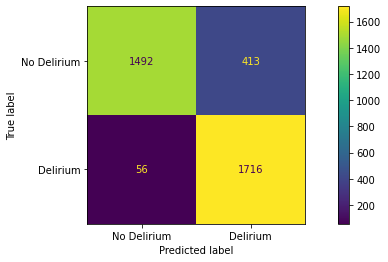

In [ ]:
from sklearn.metrics import confusion_matrix # creates a confusion matrix
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix
plot_confusion_matrix(clf_xgb, X_test, y_test, display_labels=["No Delirium", "Delirium"])

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
print(classification_report(y_test, prd))

              precision    recall  f1-score   support

           0       0.96      0.78      0.86      1905
           1       0.81      0.97      0.88      1772

    accuracy                           0.87      3677
   macro avg       0.88      0.88      0.87      3677
weighted avg       0.89      0.87      0.87      3677



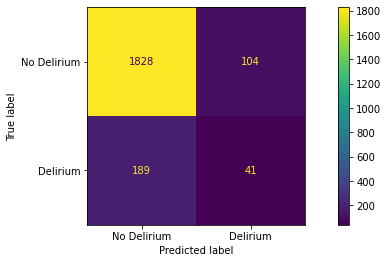

In [ ]:
from sklearn.metrics import confusion_matrix # creates a confusion matrix
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix
plot_confusion_matrix(clf_xgb, X_test, y_test, display_labels=["No Delirium", "Delirium"])

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
print(classification_report(y_test, prd))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1932
           1       0.28      0.18      0.22       230

    accuracy                           0.86      2162
   macro avg       0.59      0.56      0.57      2162
weighted avg       0.84      0.86      0.85      2162



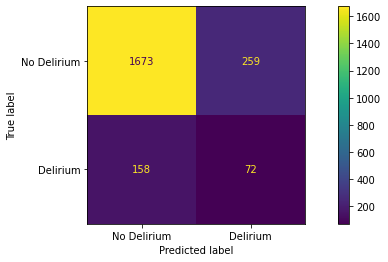

In [ ]:
from sklearn.metrics import confusion_matrix # creates a confusion matrix
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix
plot_confusion_matrix(clf_xgb, X_test, y_test, display_labels=["No Delirium", "Delirium"])

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
print(classification_report(y_test, prd))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1932
           1       0.22      0.31      0.26       230

    accuracy                           0.81      2162
   macro avg       0.57      0.59      0.57      2162
weighted avg       0.84      0.81      0.82      2162



In [ ]:
confusion_matrix = pd.crosstab(y_test,prd)
err_metric(confusion_matrix)

Precision value of the model:  0.8060122123062471
Accuracy of the model:  0.8724503671471309
Recall of the model:  0.9683972911963883
Specificity of the model:  0.7832020997375329


In [ ]:
'''Random Forest Classifier on undersampled data'''

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rfmodel = RandomForestClassifier()
rfmodel.fit(xtrain,ytrain)
print('model')
print(rfmodel)

ypredrf = rfmodel.predict(xtest)
print('confusion matrix')
print(metrics.confusion_matrix(ytest, ypredrf))
print('classification report')
print(metrics.classification_report(ytest, ypredrf))
print('Accuracy : %f' % (metrics.accuracy_score(ytest, ypredrf)))
print('Area under the curve : %f' % (metrics.roc_auc_score(ytest, ypredrf)))

model
RandomForestClassifier()
confusion matrix
[[117 115]
 [ 52 230]]
classification report
              precision    recall  f1-score   support

           0       0.69      0.50      0.58       232
           1       0.67      0.82      0.73       282

    accuracy                           0.68       514
   macro avg       0.68      0.66      0.66       514
weighted avg       0.68      0.68      0.67       514

Accuracy : 0.675097
Area under the curve : 0.659957


In [ ]:
clf_xgb = xgb.XGBClassifier(colsample_bytree= 0.6,
          gamma=0.05,
          scale_pos_weight= 40,
          eta= 0.1,
          max_depth= 25,
          min_child_weight=17,
          subsample= 0.5,objective='binary:logistic',
                            eval_metric="logloss", ## this avoids a warning...
                            seed=42, 
                            use_label_encoder=False)

In [ ]:
clf_xgb.fit(xtrain,ytrain)

XGBClassifier(colsample_bytree=0.6, eta=0.1, eval_metric='logloss', gamma=0.05,
              max_depth=25, min_child_weight=17, scale_pos_weight=40, seed=42,
              subsample=0.5, use_label_encoder=False)

In [ ]:
print('model')
print(clf_xgb)

ypredxgb = clf_xgb.predict(xtest)
print('confusion matrix')
print(metrics.confusion_matrix(ytest, ypredxgb))
print('classification report')
print(metrics.classification_report(ytest, ypredxgb))
print('Accuracy : %f' % (metrics.accuracy_score(ytest, ypredxgb)))
print('Area under the curve : %f' % (metrics.roc_auc_score(ytest, ypredxgb)))

model
XGBClassifier(colsample_bytree=0.6, eta=0.1, eval_metric='logloss', gamma=0.05,
              max_depth=25, min_child_weight=17, scale_pos_weight=40, seed=42,
              subsample=0.5, use_label_encoder=False)
confusion matrix
[[1534  776]
 [  56 1446]]
classification report
              precision    recall  f1-score   support

           0       0.96      0.66      0.79      2310
           1       0.65      0.96      0.78      1502

    accuracy                           0.78      3812
   macro avg       0.81      0.81      0.78      3812
weighted avg       0.84      0.78      0.78      3812

Accuracy : 0.781742
Area under the curve : 0.813393


In [ ]:
print('model')
print(clf_xgb)

ypredxgb = clf_xgb.predict(xtest)
print('confusion matrix')
print(metrics.confusion_matrix(ytest, ypredxgb))
print('classification report')
print(metrics.classification_report(ytest, ypredxgb))
print('Accuracy : %f' % (metrics.accuracy_score(ytest, ypredxgb)))
print('Area under the curve : %f' % (metrics.roc_auc_score(ytest, ypredxgb)))

model
XGBClassifier(colsample_bytree=0.6, eta=0.1, eval_metric='logloss', gamma=0.05,
              max_depth=25, min_child_weight=17, scale_pos_weight=40, seed=42,
              subsample=0.5, use_label_encoder=False)
confusion matrix
[[1797  526]
 [ 116  473]]
classification report
              precision    recall  f1-score   support

           0       0.94      0.77      0.85      2323
           1       0.47      0.80      0.60       589

    accuracy                           0.78      2912
   macro avg       0.71      0.79      0.72      2912
weighted avg       0.85      0.78      0.80      2912

Accuracy : 0.779533
Area under the curve : 0.788312


In [ ]:
print('model')
print(clf_xgb)

ypredxgb = clf_xgb.predict(xtest)
print('confusion matrix')
print(metrics.confusion_matrix(ytest, ypredxgb))
print('classification report')
print(metrics.classification_report(ytest, ypredxgb))
print('Accuracy : %f' % (metrics.accuracy_score(ytest, ypredxgb)))
print('Area under the curve : %f' % (metrics.roc_auc_score(ytest, ypredxgb)))

model
XGBClassifier(colsample_bytree=0.6, eta=0.1, eval_metric='logloss', gamma=0.05,
              max_depth=25, min_child_weight=17, scale_pos_weight=40, seed=42,
              subsample=0.5, use_label_encoder=False)
confusion matrix
[[  5 227]
 [  0 282]]
classification report
              precision    recall  f1-score   support

           0       1.00      0.02      0.04       232
           1       0.55      1.00      0.71       282

    accuracy                           0.56       514
   macro avg       0.78      0.51      0.38       514
weighted avg       0.76      0.56      0.41       514

Accuracy : 0.558366
Area under the curve : 0.510776


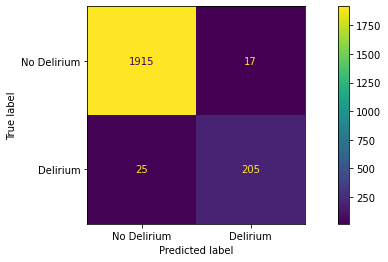

In [ ]:
from sklearn.metrics import confusion_matrix # creates a confusion matrix
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix
plot_confusion_matrix(rfmodel, X_test, y_test, display_labels=["No Delirium", "Delirium"])

In [ ]:
'''Random Forest Classifier on resampled data'''

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rfmodel = RandomForestClassifier()
rfmodel.fit(xtrain,ytrain)
print('model')
print(rfmodel)

ypredrf = rfmodel.predict(xtest)
print('confusion matrix')
print(metrics.confusion_matrix(ytest, ypredrf))
print('classification report')
print(metrics.classification_report(ytest, ypredrf))
print('Accuracy : %f' % (metrics.accuracy_score(ytest, ypredrf)))
print('Area under the curve : %f' % (metrics.roc_auc_score(ytest, ypredrf)))

model
RandomForestClassifier()
confusion matrix
[[2245   58]
 [ 180 1929]]
classification report
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2303
           1       0.97      0.91      0.94      2109

    accuracy                           0.95      4412
   macro avg       0.95      0.94      0.95      4412
weighted avg       0.95      0.95      0.95      4412

Accuracy : 0.946056
Area under the curve : 0.944733


In [ ]:
'''Random Forest Classifier on resampled data'''

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rfmodel = RandomForestClassifier()
rfmodel.fit(xtrain,ytrain)
print('model')
print(rfmodel)

ypredrf = rfmodel.predict(xtest)
print('confusion matrix')
print(metrics.confusion_matrix(ytest, ypredrf))
print('classification report')
print(metrics.classification_report(ytest, ypredrf))
print('Accuracy : %f' % (metrics.accuracy_score(ytest, ypredrf)))
print('Area under the curve : %f' % (metrics.roc_auc_score(ytest, ypredrf)))

model
RandomForestClassifier()
confusion matrix
[[2237   66]
 [ 177 1932]]
classification report
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2303
           1       0.97      0.92      0.94      2109

    accuracy                           0.94      4412
   macro avg       0.95      0.94      0.94      4412
weighted avg       0.95      0.94      0.94      4412

Accuracy : 0.944923
Area under the curve : 0.943708


In [ ]:
'''Random Forest Classifier on resampled data'''

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rfmodel = RandomForestClassifier()
rfmodel.fit(xtrain,ytrain)
print('model')
print(rfmodel)

ypredrf = rfmodel.predict(xtest)
print('confusion matrix')
print(metrics.confusion_matrix(ytest, ypredrf))
print('classification report')
print(metrics.classification_report(ytest, ypredrf))
print('Accuracy : %f' % (metrics.accuracy_score(ytest, ypredrf)))
print('Area under the curve : %f' % (metrics.roc_auc_score(ytest, ypredrf)))

model
RandomForestClassifier()
confusion matrix
[[2277   33]
 [ 222 1280]]
classification report
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      2310
           1       0.97      0.85      0.91      1502

    accuracy                           0.93      3812
   macro avg       0.94      0.92      0.93      3812
weighted avg       0.94      0.93      0.93      3812

Accuracy : 0.933106
Area under the curve : 0.918956


In [ ]:
'''Random Forest Classifier on resampled data'''

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rfmodel = RandomForestClassifier()
rfmodel.fit(xtrain,ytrain)
print('model')
print(rfmodel)

ypredrf = rfmodel.predict(xtest)
print('confusion matrix')
print(metrics.confusion_matrix(ytest, ypredrf))
print('classification report')
print(metrics.classification_report(ytest, ypredrf))
print('Accuracy : %f' % (metrics.accuracy_score(ytest, ypredrf)))
print('Area under the curve : %f' % (metrics.roc_auc_score(ytest, ypredrf)))

model
RandomForestClassifier()
confusion matrix
[[2322    1]
 [ 388  201]]
classification report
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2323
           1       1.00      0.34      0.51       589

    accuracy                           0.87      2912
   macro avg       0.93      0.67      0.72      2912
weighted avg       0.88      0.87      0.84      2912

Accuracy : 0.866415
Area under the curve : 0.670413


## Tuning Random Forest Hyperparameters 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
'''Random Forest Classifier on resampled data'''

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rfmodel = RandomForestClassifier()
rfmodel.fit(xtrain,ytrain)
print('model')
print(rfmodel)

ypredrf = rfmodel.predict(xtest)
print('confusion matrix')
print(metrics.confusion_matrix(ytest, ypredrf))
print('classification report')
print(metrics.classification_report(ytest, ypredrf))
print('Accuracy : %f' % (metrics.accuracy_score(ytest, ypredrf)))
print('Area under the curve : %f' % (metrics.roc_auc_score(ytest, ypredrf)))

model
RandomForestClassifier()
confusion matrix
[[2295    0]
 [ 293    6]]
classification report
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      2295
           1       1.00      0.02      0.04       299

    accuracy                           0.89      2594
   macro avg       0.94      0.51      0.49      2594
weighted avg       0.90      0.89      0.84      2594

Accuracy : 0.887047
Area under the curve : 0.510033


In [ ]:
#UNDERSAMPLED DATASET

'''Random Forest Classifier on resampled data'''

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rfmodel = RandomForestClassifier()
rfmodel.fit(xtrain,ytrain)
print('model')
print(rfmodel)

ypredrf = rfmodel.predict(xtest)
print('confusion matrix')
print(metrics.confusion_matrix(ytest, ypredrf))
print('classification report')
print(metrics.classification_report(ytest, ypredrf))
print('Accuracy : %f' % (metrics.accuracy_score(ytest, ypredrf)))
print('Area under the curve : %f' % (metrics.roc_auc_score(ytest, ypredrf)))

model
RandomForestClassifier()
confusion matrix
[[ 88 151]
 [ 48 227]]
classification report
              precision    recall  f1-score   support

           0       0.65      0.37      0.47       239
           1       0.60      0.83      0.70       275

    accuracy                           0.61       514
   macro avg       0.62      0.60      0.58       514
weighted avg       0.62      0.61      0.59       514

Accuracy : 0.612840
Area under the curve : 0.596828


In [ ]:
#OVERSAMPLED DATASET

'''Random Forest Classifier on resampled data'''

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rfmodel = RandomForestClassifier()
rfmodel.fit(xtrain,ytrain)
print('model')
print(rfmodel)

ypredrf = rfmodel.predict(xtest)
print('confusion matrix')
print(metrics.confusion_matrix(ytest, ypredrf))
print('classification report')
print(metrics.classification_report(ytest, ypredrf))
print('Accuracy : %f' % (metrics.accuracy_score(ytest, ypredrf)))
print('Area under the curve : %f' % (metrics.roc_auc_score(ytest, ypredrf)))

model
RandomForestClassifier()
confusion matrix
[[2235   68]
 [ 166 1943]]
classification report
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2303
           1       0.97      0.92      0.94      2109

    accuracy                           0.95      4412
   macro avg       0.95      0.95      0.95      4412
weighted avg       0.95      0.95      0.95      4412

Accuracy : 0.946963
Area under the curve : 0.945882


In [ ]:
confusion_matrix = pd.crosstab(ytest,ypredrf)
err_metric(confusion_matrix)

Precision value of the model:  0.966185977125808
Accuracy of the model:  0.9469628286491387
Recall of the model:  0.9212897107633949
Specificity of the model:  0.9704732957012592


In [ ]:
#Setting values for the parameters
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 10, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]
rf = RandomForestClassifier()
#Creating a dictionary for the hyper parameters
hyper_rf = dict(n_estimators = n_estimators, max_depth = max_depth, 
              min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf)

#Applying GridSearchCV to get the best value for hyperparameters
gridrf = GridSearchCV(rf, hyper_rf, cv = 3, verbose = 1, n_jobs = -1)
bestrf = gridrf.fit(xtrain, ytrain)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits
